In [1]:
# Cell 1: Import and verify COMETSpy
import cometspy as c
import cobra
import os
import subprocess

print("=" * 50)
print("COMETSpy Environment Check")
print("=" * 50)

print(f"✓ COMETSpy imported")
print(f"✓ COMETS_HOME: {os.environ.get('COMETS_HOME')}")

# Check COMETS executable
result = subprocess.run(['which', 'comets_scr'], capture_output=True, text=True)
print(f"✓ comets_scr: {result.stdout.strip()}")

# Get COMETS version
result = subprocess.run(['comets_scr', '-help'], capture_output=True, text=True)
if 'COMETS' in result.stdout:
    print("✓ COMETS is accessible")

print("\n✅ Environment ready for modeling!")

COMETSpy Environment Check
✓ COMETSpy imported
✓ COMETS_HOME: /opt/COMETS_2.11.0
✓ comets_scr: /opt/COMETS_2.11.0/bin/comets_scr
✓ COMETS is accessible

✅ Environment ready for modeling!


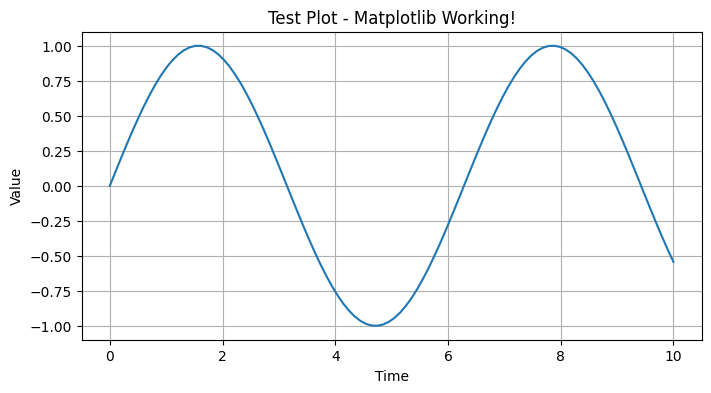

✓ Matplotlib working in notebook!


In [4]:
# Cell 3: Test plotting capabilities
import numpy as np
import matplotlib.pyplot as plt

# Create sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y)
plt.title('Test Plot - Matplotlib Working!')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

print("✓ Matplotlib working in notebook!")


In [ ]:
# Cell 1: Setup
import cometspy as c
import cobra
import pandas as pd
import matplotlib.pyplot as plt

print("Setting up E. coli growth simulation...")

# Cell 2: Load E. coli model
# Using the built-in test model
test_model = cobra.io.load_model("textbook")

print(f"Loaded model: {test_model.id}")
print(f"Reactions: {len(test_model.reactions)}")
print(f"Metabolites: {len(test_model.metabolites)}")
print(f"Genes: {len(test_model.genes)}")

# Cell 3: Create COMETS modelh
# Convert COBRA model to COMETS model
comets_model = c.model(test_model)
comets_model.initial_pop = [0, 0, 1e-7]  # Starting biomass

print(f"✓ COMETS model created")
print(f"  Initial population: {comets_model.initial_pop}")

# Cell 4: Set up simulation layout
# Create layout (environment)
layout = c.layout()
layout.add_model(comets_model)

# Set up initial media (nutrients)
layout.set_specific_metabolite('glc__D_e', 10)  # Glucose
layout.set_specific_metabolite('o2_e', 1000)    # Oxygen

print("✓ Layout created with nutrients")
print(f"  Glucose: 10 mmol")
print(f"  Oxygen: 1000 mmol")

# Cell 5: Configure simulation parameters
sim_params = c.params()

# Simulation settings
sim_params.set_param('maxCycles', 100)
sim_params.set_param('timeStep', 0.1)
sim_params.set_param('writeMediaLog', True)
sim_params.set_param('writeBiomassLog', True)

print("✓ Parameters configured")
print(f"  Max cycles: {sim_params.all_params['maxCycles']}")
print(f"  Time step: {sim_params.all_params['timeStep']}")

# Cell 6: Run simulation
print("Running COMETS simulation...")

simulation = c.comets(layout, sim_params)
simulation.run()

print("✓ Simulation complete!")

# Cell 7: Visualize results
# Get biomass data
biomass = simulation.total_biomass

# Plot growth curve
plt.figure(figsize=(10, 6))
plt.plot(biomass['cycle'], biomass.iloc[:, 1])
plt.xlabel('Time (cycles)')
plt.ylabel('Biomass')
plt.title('E. coli Growth Curve')
plt.grid(True)
plt.show()

print("✓ Growth curve plotted!")

# Cell 8: Analyze results
print("Simulation Summary:")
print(f"  Final biomass: {biomass.iloc[-1, 1]:.6f}")
print(f"  Final cycle: {biomass.iloc[-1, 0]}")
print(f"  Growth achieved: {biomass.iloc[-1, 1] > biomass.iloc[0, 1]}")


Setting up E. coli growth simulation...
Loaded model: e_coli_core
Reactions: 95
Metabolites: 72
Genes: 137
✓ COMETS model created
  Initial population: [0, 0, 1e-07]
building empty layout model
models will need to be added with layout.add_model()
✓ Layout created with nutrients
  Glucose: 10 mmol
  Oxygen: 1000 mmol
✓ Parameters configured
  Max cycles: 100
  Time step: 0.1
Running COMETS simulation...
could not find environmental variable GUROBI_COMETS_HOME or GUROBI_HOME or COMETS_GUROBI_HOME
COMETS will not work with GUROBI until this is solved. 
Here is a solution:
    1. import os and set os.environ['GUROBI_HOME'] then try to make a comets object again
       e.g.   import os
              os.environ['GUROBI_HOME'] = 'C:\\gurobi902\\win64'
These are the expected locations for dependencies:
Dependency 			 expected path
__________ 			 _____________
gurobi			/lib/gurobi.jar

  You have two options to fix this problem:
1.  set each class path correctly by doing:
    comets.set_classpa

RuntimeError: COMETS simulation did not complete:
 JAVA could not find gurobi.
try the following: 
>>> import os
>>> os.environ['GUROBI_COMETS_HOME']
if there is nothing there try setting that variable
to the location of gurobi.jar, for example:
>>> os.environ['GUROBI_COMETS_HOME'] = '/opt/gurobi900/linux64'

In [2]:
# Debug cell - run this first
import os
import subprocess

print("Environment Check:")
print(f"GUROBI_HOME: {os.environ.get('GUROBI_HOME')}")
print(f"GUROBI_COMETS_HOME: {os.environ.get('GUROBI_COMETS_HOME')}")
print(f"GRB_LICENSE_FILE: {os.environ.get('GRB_LICENSE_FILE')}")
print(f"COMETS_HOME: {os.environ.get('COMETS_HOME')}")

print("\nChecking for gurobi.jar:")
result = subprocess.run(['find', '/opt', '-name', 'gurobi.jar'], capture_output=True, text=True)
print(result.stdout)

print("\nChecking COMETS lib directory:")
result = subprocess.run(['ls', '-la', '/opt/COMETS_2.11.0/lib/'], capture_output=True, text=True)
print(result.stdout)

Environment Check:
GUROBI_HOME: None
GUROBI_COMETS_HOME: None
GRB_LICENSE_FILE: None
COMETS_HOME: /opt/COMETS_2.11.0

Checking for gurobi.jar:


Checking COMETS lib directory:
total 1520
drwxr-sr-x 12 170428 232411    4096 Feb  5  2025 .
drwxr-sr-x  5 170428 232411    4096 Feb  5  2025 ..
drwxr-sr-x  5 170428 232411    4096 Feb  5  2025 JMatIO
drwxr-sr-x  6 170428 232411    4096 Feb  5  2025 colt
drwxr-sr-x  9 170428 232411    4096 Feb  5  2025 cometspy-master
drwxr-sr-x  3 170428 232411    4096 Feb  5  2025 commons-lang3-3.9
drwxr-sr-x  3 170428 232411    4096 Feb  5  2025 commons-math3-3.6.1
drwxr-sr-x  2 170428 232411    4096 Feb  5  2025 commons-rng-1.0
-rwxr-xr-x  1 170428 232411 1503847 Feb  5  2025 jdistlib-0.4.5-bin.jar
drwxr-sr-x  5 170428 232411    4096 Feb  5  2025 jmatio
drwxr-sr-x  3 170428 232411    4096 Feb  5  2025 jogl
drwxr-sr-x  2 170428 232411    4096 Feb  5  2025 junit
drwxr-sr-x  3 170428 232411    4096 Feb  5  2025 or-tools

